In [1]:
cd ..

/Users/muhammadfarooq/Codebase/thesis-experiment/Pith2Bark


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

from sklearn.model_selection import train_test_split

from src.winner import winner_model_rings
from src.damage import merge_df
from src.damage import read_damage_min_max
from src.damage import read_damage_mean

In [3]:
import warnings
warnings.simplefilter('ignore')

# Set Seaborn theme
sns.set_theme(color_codes=True)

# Damage Dataset

In [4]:
mse_url = "output/ringsranking_mse_sixteen.csv"
rings_url = "output/ringsranking_rings_sixteen.csv"
df_ringsranking_sixteen = winner_model_rings(mse_url, rings_url)

mse_url = "output/ringsranking_mse_thirtytwo.csv"
rings_url = "output/ringsranking_rings_thirtytwo.csv"
df_ringsranking_thirtytwo = winner_model_rings(mse_url, rings_url)

Polar Pith Canny(blur otsu) 12.829318845239923 (subseq)
Polar Pith Canny(blur otsu) 12.88055458721076 (subseq)


In [5]:
mse_url = "output/pine_mse_sixteen.csv"
rings_url = "output/pine_rings_sixteen.csv"
df_pine_sixteen = winner_model_rings(mse_url, rings_url)

mse_url = "output/pine_mse_thirtytwo.csv"
rings_url = "output/pine_rings_thirtytwo.csv"
df_pine_thirtytwo = winner_model_rings(mse_url, rings_url)

Polar Pith Canny(blur triangle) 19.888455438324574 (peaks)
Polar Pith Canny(blur triangle) 19.591747084408897 (peaks)


In [6]:
mse_url = "output/fur_mse_sixteen.csv"
rings_url = "output/fur_rings_sixteen.csv"
df_fur_sixteen = winner_model_rings(mse_url, rings_url)

mse_url = "output/fur_mse_thirtytwo.csv"
rings_url = "output/fur_rings_thirtytwo.csv"
df_fur_thirtytwo = winner_model_rings(mse_url, rings_url)

Polar Pith Canny(blur triangle) 13.428984012468806 (peaks)
Polar Pith Canny(blur triangle) 13.688767879960144 (peaks)


In [7]:
mse_url = "output/tracy_mse_sixteen.csv"
rings_url = "output/tracy_rings_sixteen.csv"
df_tracy_sixteen = winner_model_rings(mse_url, rings_url)

mse_url = "output/tracy_mse_thirtytwo.csv"
rings_url = "output/tracy_rings_thirtytwo.csv"
df_tracy_thirtytwo = winner_model_rings(mse_url, rings_url)

Polar Canny(triangle) 39.683736416974455 (peaks)
Polar Pith Canny(triangle) 39.48914666858598 (peaks)


In [8]:
mse_url = "output/data_mse_sixteen.csv"
rings_url = "output/data_rings_sixteen.csv"
df_data_sixteen = winner_model_rings(mse_url, rings_url)

mse_url = "output/data_mse_thirtytwo.csv"
rings_url = "output/data_rings_thirtytwo.csv"
df_data_thirtytwo = winner_model_rings(mse_url, rings_url)

Canny(triangle) 18.789996216404624 (subseq)
Canny(triangle) 18.871624925897343 (subseq)


In [9]:
#damage
damage_sixteen_url = "damage/damage_sixteen.csv"
damage_thirtytwo_url = "damage/damage_thirtytwo.csv"

#merge
df_merge_sixteen = merge_df(df_ringsranking_sixteen, df_pine_sixteen, df_fur_sixteen, df_tracy_sixteen, df_data_sixteen)
df_merge_thirtytwo = merge_df(df_ringsranking_thirtytwo, df_pine_thirtytwo, df_fur_thirtytwo, df_tracy_thirtytwo, df_data_thirtytwo)

df_damage_sixteen_min_max = read_damage_min_max(damage_sixteen_url, df_merge_sixteen)
df_damage_thirtytwo_min_max = read_damage_min_max(damage_thirtytwo_url, df_merge_thirtytwo)

df_damage_sixteen_mean = read_damage_mean(damage_sixteen_url, df_merge_sixteen)
df_damage_thirtytwo_mean = read_damage_mean(damage_thirtytwo_url, df_merge_thirtytwo)

In [10]:
#df_damage_sixteen_min_max

In [11]:
#df_damage_thirtytwo_min_max

In [12]:
#df_damage_sixteen_mean

In [13]:
#df_damage_thirtytwo_mean

In [14]:
#STOP

# Config

In [15]:
def heat_map(df, max=1, min=-1):

    # Generate a mask for the upper triangle
    mask = np.triu(np.ones_like(df, dtype=bool),1)

    # Set up the matplotlib figure
    #f, ax = plt.subplots(figsize=(11, 9))
    f, ax = plt.subplots(figsize=(4, 3))

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(230, 20, as_cmap=True)

    labels = ['Not Damage', 'Damaged']
    
    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(df, mask=mask, cmap=cmap, vmax=max, center=(max+min)/2, vmin=min,
                square=True, annot=True, linewidths=.2, cbar_kws={"shrink": .5},
                xticklabels=labels, yticklabels=labels)

    plt.xlabel('Predicted label')
    plt.ylabel('Actual label')
    plt.show()

In [16]:
def plot_accuracy(x, y, tick_label):
    plt.bar(x, y, tick_label=tick_label, width=0.8)
    
    plt.xticks(rotation=45, horizontalalignment="right")
    plt.xlabel('Model')
    plt.ylabel('Accuracy')
    plt.title('Model vs Accuracy')
    plt.show()

In [17]:
def plot_accuracy(title, data):
    models = list(data.keys())
    performance = list(data.values())

    fig = plt.figure(figsize = (14, 10))

    plt.bar(models, performance, color ='maroon', width = 0.4)

    plt.text(0, performance[0] + 0.01, performance[0], ha='center', fontsize=12)
    plt.text(1, performance[1] + 0.01, performance[1], ha='center', fontsize=12)
    plt.text(2, performance[2] + 0.01, performance[2], ha='center', fontsize=12)
    plt.text(3, performance[3] + 0.01, performance[3], ha='center', fontsize=12)
    plt.text(4, performance[4] + 0.01, performance[4], ha='center', fontsize=12)
    plt.text(5, performance[5] + 0.01, performance[5], ha='center', fontsize=12)
    plt.text(6, performance[6] + 0.01, performance[6], ha='center', fontsize=12)
    plt.text(7, performance[6] + 0.01, performance[6], ha='center', fontsize=12)

    plt.title(title)
    plt.show()

In [18]:
def df_train_test_split(df):
    columns = ['image', 'algo']
    training_percent = 0.9
    y_train, y_test, X_train, X_test  = train_test_split(df[["Damage"]], df.drop(columns=columns), train_size = training_percent)

    return  y_train, y_test, X_train, X_test

In [19]:
def check_correctness(df, original_label, predicted_label):
    correct = len(df[(df[original_label] == df[predicted_label])])
    incorrect = len(df) - correct

    return (correct,incorrect,(correct*100/(correct+incorrect)))

In [20]:
def logistic_regression(y_train, y_test, X_train, X_test):
    model = LogisticRegression(solver='liblinear', C=25.0, random_state=0).fit(X_train, y_train)

    print('Classes: ',model.classes_)
    print("\n")
    print('Intercept: ', model.intercept_)
    print("\n")
    print('Coefficeients: ', model.coef_)
    print("\n")
    
    prob = model.predict_proba(X_test)

    # Find maximum value from probability prediction array
    max_values = pd.DataFrame(prob, columns = range(0,2))

    # Dominant
    dominant = model.classes_[max_values.idxmax(axis=1, skipna=True)]
    comparison = pd.DataFrame({'Original': y_test.Damage, 'Dominant':dominant})
    print(comparison)
    print("\n")
    
    print(classification_report(y_test, model.predict(X_test), digits = 3))
    model_accuracy = accuracy_score(y_test, model.predict(X_test))
    print('Accuracy:' + str(model_accuracy))
    print("\n")
    
    c,e,p = check_correctness(comparison, "Original", "Dominant")

    print("correct:" + str(c))
    print("incorrect:" + str(e))
    print("percentage:" + str(p))
    print("\n")
    
    confusion_matrix = comparison.groupby(['Dominant','Original']).size().unstack('Original').fillna(0)
    print(confusion_matrix)
    print("\n")
    
    pivot = confusion_matrix.to_numpy().max()/2
    heat_map(confusion_matrix, pivot, 0)
    
    return model_accuracy

In [21]:
def gaussiannb(y_train, y_test, X_train, X_test):
    gnb = GaussianNB()
    model = gnb.fit(X_train,y_train)
    
    prob = model.predict_proba(X_test)

    # Find maximum value from probability prediction array
    max_values = pd.DataFrame(prob, columns = range(0,2))

    # Dominant
    dominant = model.classes_[max_values.idxmax(axis=1, skipna=True)]
    comparison = pd.DataFrame({'Original': y_test.Damage, 'Dominant':dominant})
    print(comparison)
    print("\n")
    
    print(classification_report(y_test, model.predict(X_test), digits = 3))
    model_accuracy = accuracy_score(y_test, model.predict(X_test))
    print('Accuracy:' + str(model_accuracy))
    print("\n")

    c,e,p = check_correctness(comparison, "Original", "Dominant")

    print("correct:" + str(c))
    print("incorrect:" + str(e))
    print("percentage:" + str(p))
    print("\n")
    
    confusion_matrix = comparison.groupby(['Dominant','Original']).size().unstack('Original').fillna(0)
    print(confusion_matrix)
    print("\n")
    
    pivot = confusion_matrix.to_numpy().max()/2
    heat_map(confusion_matrix, pivot, 0)
    
    return model_accuracy

In [22]:
def multinomialnb(y_train, y_test, X_train, X_test):
    mnb = MultinomialNB()
    model = mnb.fit(X_train,y_train)
    
    prob = model.predict_proba(X_test)

    # Find maximum value from probability prediction array
    max_values = pd.DataFrame(prob, columns = range(0,2))

    # Dominant
    dominant = model.classes_[max_values.idxmax(axis=1, skipna=True)]
    comparison = pd.DataFrame({'Original': y_test.Damage, 'Dominant':dominant})
    print(comparison)
    print("\n")
    
    print(classification_report(y_test, model.predict(X_test), digits = 3))
    model_accuracy = accuracy_score(y_test, model.predict(X_test))
    print('Accuracy:' + str(model_accuracy))
    print("\n")

    c,e,p = check_correctness(comparison, "Original", "Dominant")

    print("correct:" + str(c))
    print("incorrect:" + str(e))
    print("percentage:" + str(p))
    print("\n")
    
    confusion_matrix = comparison.groupby(['Dominant','Original']).size().unstack('Original').fillna(0)
    print(confusion_matrix)
    print("\n")
    
    pivot = confusion_matrix.to_numpy().max()/2
    heat_map(confusion_matrix, pivot, 0)
    
    return model_accuracy

In [23]:
def lda(y_train, y_test, X_train, X_test):
    model = LinearDiscriminantAnalysis().fit(X_train, y_train)

    print(model.classes_)
    print("\n")
    print(model.priors_)
    print("\n")
    print(model.means_)
    print("\n")
    print(model.coef_)
    print("\n")
    
    prob = model.predict_proba(X_test)

    # Find maximum value from probability prediction array
    max_values = pd.DataFrame(prob, columns = range(0,2))

    # Dominant
    dominant = model.classes_[max_values.idxmax(axis=1, skipna=True)]
    comparison = pd.DataFrame({'Original': y_test.Damage, 'Dominant':dominant})
    print(comparison)
    print("\n")
    
    print(classification_report(y_test, model.predict(X_test), digits = 3))
    model_accuracy = accuracy_score(y_test, model.predict(X_test))
    print('Accuracy:' + str(model_accuracy))
    print("\n")
    
    c,e,p = check_correctness(comparison, "Original", "Dominant")

    print("correct:" + str(c))
    print("incorrect:" + str(e))
    print("percentage:" + str(p))
    print("\n")
    
    confusion_matrix = comparison.groupby(['Dominant','Original']).size().unstack('Original').fillna(0)
    print(confusion_matrix)
    print("\n")
    
    pivot = confusion_matrix.to_numpy().max()/2
    heat_map(confusion_matrix, pivot, 0)
    
    return model_accuracy

In [24]:
def knn(y_train, y_test, X_train, X_test, n):
    model = KNeighborsClassifier(n_neighbors=n).fit(X_train, y_train)
    
    prob = model.predict_proba(X_test)

    # Find maximum value from probability prediction array
    max_values = pd.DataFrame(prob, columns = range(0,2))

    # Dominant
    dominant = model.classes_[max_values.idxmax(axis=1, skipna=True)]
    comparison = pd.DataFrame({'Original': y_test.Damage, 'Dominant':dominant})
    print(comparison)
    print("\n")

    print(classification_report(y_test, model.predict(X_test), digits = 3))
    model_accuracy = accuracy_score(y_test, model.predict(X_test))
    print('Accuracy:' + str(model_accuracy))
    print("\n")
    
    c,e,p = check_correctness(comparison, "Original", "Dominant")

    print("correct:" + str(c))
    print("incorrect:" + str(e))
    print("percentage:" + str(p))
    print("\n")
    
    confusion_matrix = comparison.groupby(['Dominant','Original']).size().unstack('Original').fillna(0)
    print(confusion_matrix)
    print("\n")

    pivot = confusion_matrix.to_numpy().max()/2
    heat_map(confusion_matrix, pivot, 0)
    
    return model_accuracy

In [25]:
accuracy_sixteen_min_max = []
accuracy_thirtytwo_min_max = []
accuracy_sixteen_mean = []
accuracy_thirtytwo_mean = []

columns = ['image', 'algo']
training_percent = 0.9

# MinMax

## 16

In [26]:
df = df_damage_sixteen_min_max
X = df.drop(columns=columns)
y = df[["Damage"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=training_percent)

Classes:  [0 1]


Intercept:  [-6.49156705]


Coefficeients:  [[ 7.66394640e+00 -4.22296985e-02  2.08457541e-02  1.95563249e-02
  -2.19627653e-02  7.31370519e-03 -9.29410796e-03  1.70037504e-02
  -1.34191535e-02 -2.08269232e-02 -1.07231168e-02  6.03421996e-03
   1.22113099e-02  1.29758460e-02 -5.12635364e-02  2.18568783e-02
   8.66462293e-03 -1.01219750e-01  1.20994287e-01 -2.70355562e-03
  -8.94397769e-03]]


     Original  Dominant
5           0         0
99          0         0
86          0         0
42          1         1
97          0         0
33          1         1
25          1         1
77          1         1
131         0         0
79          1         1
23          1         1
127         0         0
1           1         1
122         0         0
24          1         1


              precision    recall  f1-score   support

           0      1.000     1.000     1.000         7
           1      1.000     1.000     1.000         8

    accuracy                        

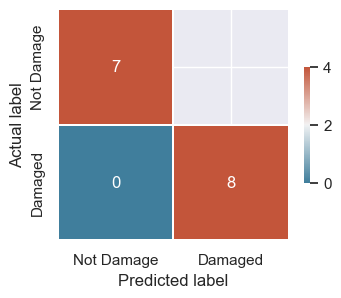

In [27]:
acc = logistic_regression(y_train, y_test, X_train, X_test)
accuracy_sixteen_min_max.append(round(acc, 2))

     Original  Dominant
5           0         0
99          0         0
86          0         0
42          1         1
97          0         0
33          1         1
25          1         1
77          1         1
131         0         0
79          1         1
23          1         1
127         0         0
1           1         1
122         0         0
24          1         1


              precision    recall  f1-score   support

           0      1.000     1.000     1.000         7
           1      1.000     1.000     1.000         8

    accuracy                          1.000        15
   macro avg      1.000     1.000     1.000        15
weighted avg      1.000     1.000     1.000        15

Accuracy:1.0


correct:15
incorrect:0
percentage:100.0


Original    0    1
Dominant          
0         7.0  0.0
1         0.0  8.0




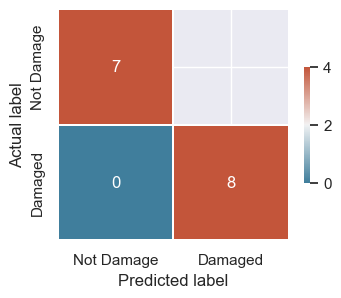

In [28]:
acc = gaussiannb(y_train, y_test, X_train, X_test)
accuracy_sixteen_min_max.append(round(acc, 2))

     Original  Dominant
5           0         0
99          0         0
86          0         0
42          1         1
97          0         0
33          1         1
25          1         1
77          1         1
131         0         0
79          1         1
23          1         1
127         0         0
1           1         0
122         0         0
24          1         1


              precision    recall  f1-score   support

           0      0.875     1.000     0.933         7
           1      1.000     0.875     0.933         8

    accuracy                          0.933        15
   macro avg      0.938     0.938     0.933        15
weighted avg      0.942     0.933     0.933        15

Accuracy:0.9333333333333333


correct:14
incorrect:1
percentage:93.33333333333333


Original    0    1
Dominant          
0         7.0  1.0
1         0.0  7.0




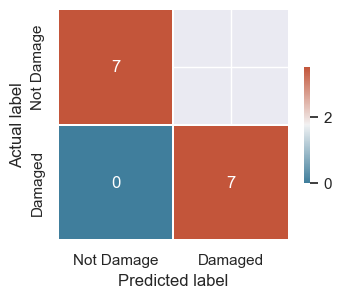

In [29]:
acc = multinomialnb(y_train, y_test, X_train, X_test)
accuracy_sixteen_min_max.append(round(acc, 2))

[0 1]


[0.65413534 0.34586466]


[[  0.          51.22988506  48.90804598  46.95402299  44.31034483
   43.74712644  44.8045977   42.8045977   44.75862069  45.82758621
   47.59770115  50.12643678  47.82758621  46.35632184  45.11494253
   45.26436782  46.25287356  34.12643678  59.71264368  46.36781609
   47.91494253]
 [  1.          81.30434783  85.5         87.97826087  80.93478261
   89.69565217  90.67391304  87.63043478  85.82608696  89.41304348
   98.10869565  93.          91.65217391  85.52173913  78.89130435
   87.17391304  91.54347826  56.45652174 121.26086957  87.80298913
   85.13913043]]


[[ 0.         -0.04504702  0.02468052  0.01709917  0.05169627 -0.06779064
  -0.11191819  0.08876386 -0.030139   -0.10545409 -0.03379769 -0.02733428
   0.05103153  0.04501389 -0.03676692  0.05369821  0.034617   -0.20664959
   0.41810328 -0.01765277  0.00309576]]


     Original  Dominant
5           0         0
99          0         0
86          0         0
42          1         1
97         

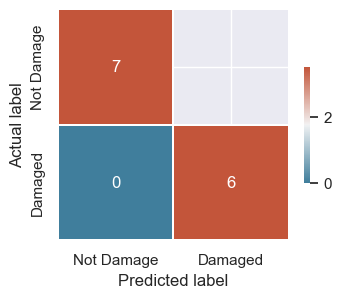

In [30]:
acc = lda(y_train, y_test, X_train, X_test)
accuracy_sixteen_min_max.append(round(acc, 2))

     Original  Dominant
5           0         0
99          0         0
86          0         0
42          1         1
97          0         0
33          1         1
25          1         1
77          1         0
131         0         0
79          1         0
23          1         1
127         0         0
1           1         1
122         0         0
24          1         0


              precision    recall  f1-score   support

           0      0.700     1.000     0.824         7
           1      1.000     0.625     0.769         8

    accuracy                          0.800        15
   macro avg      0.850     0.812     0.796        15
weighted avg      0.860     0.800     0.795        15

Accuracy:0.8


correct:12
incorrect:3
percentage:80.0


Original    0    1
Dominant          
0         7.0  3.0
1         0.0  5.0




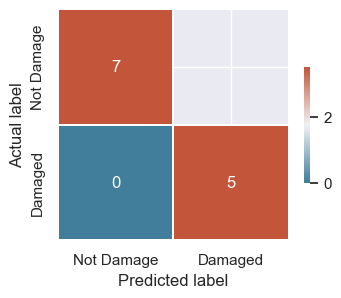

In [31]:
acc = knn(y_train,y_test ,X_train, X_test, 1)
accuracy_sixteen_min_max.append(round(acc, 2))

     Original  Dominant
5           0         0
99          0         0
86          0         0
42          1         1
97          0         0
33          1         1
25          1         1
77          1         0
131         0         0
79          1         0
23          1         1
127         0         0
1           1         1
122         0         0
24          1         0


              precision    recall  f1-score   support

           0      0.700     1.000     0.824         7
           1      1.000     0.625     0.769         8

    accuracy                          0.800        15
   macro avg      0.850     0.812     0.796        15
weighted avg      0.860     0.800     0.795        15

Accuracy:0.8


correct:12
incorrect:3
percentage:80.0


Original    0    1
Dominant          
0         7.0  3.0
1         0.0  5.0




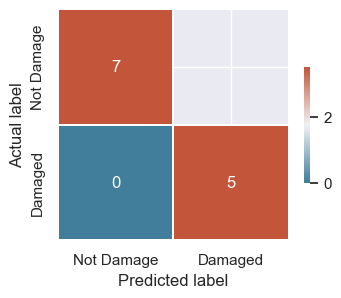

In [32]:
acc = knn(y_train,y_test ,X_train, X_test, 2)
accuracy_sixteen_min_max.append(round(acc, 2))

     Original  Dominant
5           0         0
99          0         0
86          0         0
42          1         1
97          0         1
33          1         1
25          1         1
77          1         0
131         0         0
79          1         0
23          1         1
127         0         0
1           1         1
122         0         0
24          1         1


              precision    recall  f1-score   support

           0      0.750     0.857     0.800         7
           1      0.857     0.750     0.800         8

    accuracy                          0.800        15
   macro avg      0.804     0.804     0.800        15
weighted avg      0.807     0.800     0.800        15

Accuracy:0.8


correct:12
incorrect:3
percentage:80.0


Original  0  1
Dominant      
0         6  2
1         1  6




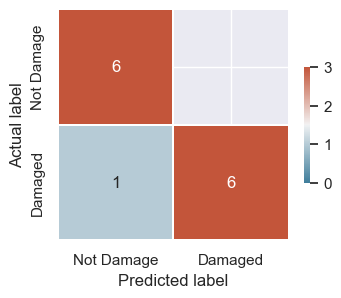

In [33]:
acc = knn(y_train,y_test ,X_train, X_test, 3)
accuracy_sixteen_min_max.append(round(acc, 2))

     Original  Dominant
5           0         0
99          0         0
86          0         0
42          1         1
97          0         0
33          1         1
25          1         1
77          1         0
131         0         0
79          1         0
23          1         1
127         0         0
1           1         1
122         0         0
24          1         1


              precision    recall  f1-score   support

           0      0.778     1.000     0.875         7
           1      1.000     0.750     0.857         8

    accuracy                          0.867        15
   macro avg      0.889     0.875     0.866        15
weighted avg      0.896     0.867     0.865        15

Accuracy:0.8666666666666667


correct:13
incorrect:2
percentage:86.66666666666667


Original    0    1
Dominant          
0         7.0  2.0
1         0.0  6.0




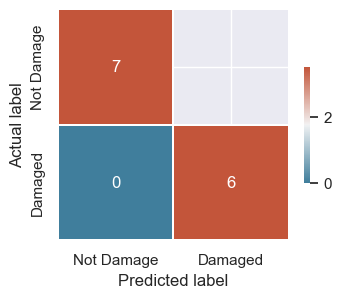

In [34]:
acc = knn(y_train,y_test ,X_train, X_test, 4)
accuracy_sixteen_min_max.append(round(acc, 2))

     Original  Dominant
5           0         0
99          0         0
86          0         0
42          1         1
97          0         0
33          1         1
25          1         1
77          1         0
131         0         0
79          1         0
23          1         1
127         0         0
1           1         1
122         0         0
24          1         1


              precision    recall  f1-score   support

           0      0.778     1.000     0.875         7
           1      1.000     0.750     0.857         8

    accuracy                          0.867        15
   macro avg      0.889     0.875     0.866        15
weighted avg      0.896     0.867     0.865        15

Accuracy:0.8666666666666667


correct:13
incorrect:2
percentage:86.66666666666667


Original    0    1
Dominant          
0         7.0  2.0
1         0.0  6.0




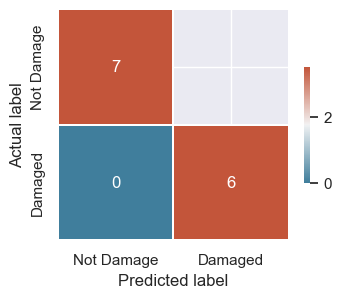

In [35]:
acc = knn(y_train,y_test ,X_train, X_test, 5)
accuracy_sixteen_min_max.append(round(acc, 2))

In [36]:
#STOP

## 32

In [37]:
df = df_damage_sixteen_min_max
X = df.drop(columns=columns)
y = df[["Damage"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=training_percent)

Classes:  [0 1]


Intercept:  [-6.67809229]


Coefficeients:  [[ 7.22856341e+00 -5.59624351e-02  3.70495688e-02  2.47920207e-02
  -1.91454284e-02  2.47593495e-04 -1.10828856e-02  1.74379071e-02
  -8.14236261e-03 -1.64372886e-02 -2.00385486e-02  1.39416806e-02
   2.29753459e-03  1.44080950e-02 -5.42997540e-02  1.23926265e-02
   1.03955350e-02 -1.14034029e-01  1.42189568e-01 -3.25913382e-03
  -1.10913943e-02]]


     Original  Dominant
140         0         0
95          0         0
76          0         0
125         0         0
70          1         1
102         0         0
146         0         0
5           0         0
113         1         1
131         0         0
71          0         0
65          0         0
114         0         0
58          0         0
142         0         0


              precision    recall  f1-score   support

           0      1.000     1.000     1.000        13
           1      1.000     1.000     1.000         2

    accuracy                        

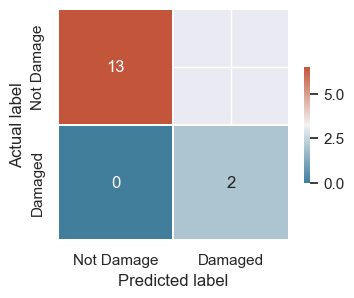

In [38]:
acc = logistic_regression(y_train, y_test, X_train, X_test)
accuracy_thirtytwo_min_max.append(round(acc, 2))

     Original  Dominant
140         0         0
95          0         0
76          0         0
125         0         0
70          1         1
102         0         0
146         0         0
5           0         0
113         1         1
131         0         0
71          0         0
65          0         0
114         0         0
58          0         0
142         0         0


              precision    recall  f1-score   support

           0      1.000     1.000     1.000        13
           1      1.000     1.000     1.000         2

    accuracy                          1.000        15
   macro avg      1.000     1.000     1.000        15
weighted avg      1.000     1.000     1.000        15

Accuracy:1.0


correct:15
incorrect:0
percentage:100.0


Original     0    1
Dominant           
0         13.0  0.0
1          0.0  2.0




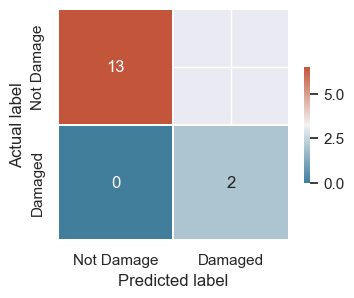

In [39]:
acc = gaussiannb(y_train, y_test, X_train, X_test)
accuracy_thirtytwo_min_max.append(round(acc, 2))

     Original  Dominant
140         0         0
95          0         0
76          0         0
125         0         1
70          1         0
102         0         1
146         0         0
5           0         0
113         1         0
131         0         0
71          0         0
65          0         0
114         0         0
58          0         0
142         0         0


              precision    recall  f1-score   support

           0      0.846     0.846     0.846        13
           1      0.000     0.000     0.000         2

    accuracy                          0.733        15
   macro avg      0.423     0.423     0.423        15
weighted avg      0.733     0.733     0.733        15

Accuracy:0.7333333333333333


correct:11
incorrect:4
percentage:73.33333333333333


Original     0    1
Dominant           
0         11.0  2.0
1          2.0  0.0




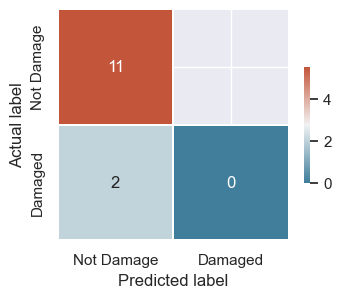

In [40]:
acc = multinomialnb(y_train, y_test, X_train, X_test)
accuracy_thirtytwo_min_max.append(round(acc, 2))

[0 1]


[0.60902256 0.39097744]


[[  0.          51.48148148  48.64197531  47.39506173  44.35802469
   43.66666667  45.09876543  42.9382716   44.66666667  45.40740741
   48.35802469  49.80246914  48.04938272  46.28395062  45.5308642
   45.          46.24691358  34.          59.83950617  46.43287037
   47.50617284]
 [  1.          79.40384615  84.84615385  88.03846154  80.36538462
   88.55769231  91.28846154  88.65384615  85.63461538  88.30769231
   96.09615385  93.92307692  90.65384615  83.67307692  77.36538462
   84.94230769  90.25        55.96153846 120.75        87.
   83.28589744]]


[[ 0.         -0.05003377  0.06892705  0.01807134  0.06324693 -0.07502409
  -0.07644388  0.07989858 -0.02509527 -0.06156061 -0.05517685  0.01727108
   0.02372763  0.03804053 -0.0593323   0.00738972  0.02920557 -0.23348619
   0.37820052 -0.00989079 -0.00261929]]


     Original  Dominant
140         0         0
95          0         0
76          0         0
125         0         0
70          1       

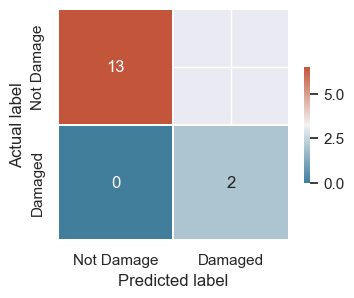

In [41]:
acc = lda(y_train, y_test, X_train, X_test)
accuracy_thirtytwo_min_max.append(round(acc, 2))

     Original  Dominant
140         0         0
95          0         0
76          0         0
125         0         0
70          1         1
102         0         0
146         0         0
5           0         0
113         1         1
131         0         0
71          0         0
65          0         0
114         0         0
58          0         0
142         0         0


              precision    recall  f1-score   support

           0      1.000     1.000     1.000        13
           1      1.000     1.000     1.000         2

    accuracy                          1.000        15
   macro avg      1.000     1.000     1.000        15
weighted avg      1.000     1.000     1.000        15

Accuracy:1.0


correct:15
incorrect:0
percentage:100.0


Original     0    1
Dominant           
0         13.0  0.0
1          0.0  2.0




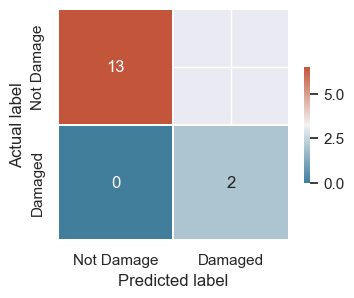

In [42]:
acc = knn(y_train,y_test ,X_train, X_test, 1)
accuracy_thirtytwo_min_max.append(round(acc, 2))

     Original  Dominant
140         0         0
95          0         0
76          0         0
125         0         0
70          1         0
102         0         0
146         0         0
5           0         0
113         1         0
131         0         0
71          0         0
65          0         0
114         0         0
58          0         0
142         0         0


              precision    recall  f1-score   support

           0      0.867     1.000     0.929        13
           1      0.000     0.000     0.000         2

    accuracy                          0.867        15
   macro avg      0.433     0.500     0.464        15
weighted avg      0.751     0.867     0.805        15

Accuracy:0.8666666666666667


correct:13
incorrect:2
percentage:86.66666666666667


Original   0  1
Dominant       
0         13  2




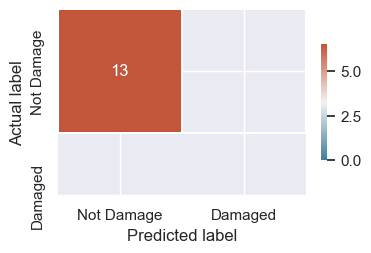

In [43]:
acc = knn(y_train,y_test ,X_train, X_test, 2)
accuracy_thirtytwo_min_max.append(round(acc, 2))

     Original  Dominant
140         0         0
95          0         0
76          0         0
125         0         0
70          1         0
102         0         0
146         0         0
5           0         0
113         1         1
131         0         0
71          0         0
65          0         0
114         0         0
58          0         0
142         0         0


              precision    recall  f1-score   support

           0      0.929     1.000     0.963        13
           1      1.000     0.500     0.667         2

    accuracy                          0.933        15
   macro avg      0.964     0.750     0.815        15
weighted avg      0.938     0.933     0.923        15

Accuracy:0.9333333333333333


correct:14
incorrect:1
percentage:93.33333333333333


Original     0    1
Dominant           
0         13.0  1.0
1          0.0  1.0




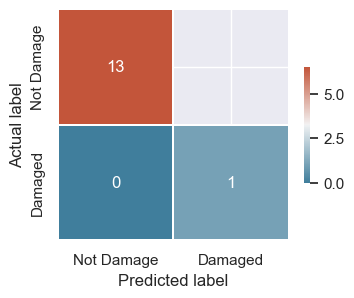

In [44]:
acc = knn(y_train,y_test ,X_train, X_test, 3)
accuracy_thirtytwo_min_max.append(round(acc, 2))

     Original  Dominant
140         0         0
95          0         0
76          0         0
125         0         0
70          1         0
102         0         0
146         0         0
5           0         0
113         1         1
131         0         0
71          0         0
65          0         0
114         0         0
58          0         0
142         0         0


              precision    recall  f1-score   support

           0      0.929     1.000     0.963        13
           1      1.000     0.500     0.667         2

    accuracy                          0.933        15
   macro avg      0.964     0.750     0.815        15
weighted avg      0.938     0.933     0.923        15

Accuracy:0.9333333333333333


correct:14
incorrect:1
percentage:93.33333333333333


Original     0    1
Dominant           
0         13.0  1.0
1          0.0  1.0




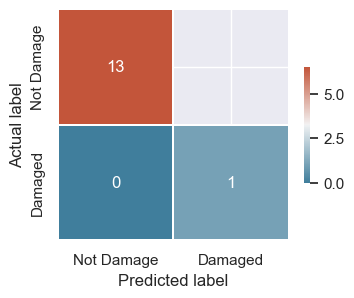

In [45]:
acc = knn(y_train,y_test ,X_train, X_test, 4)
accuracy_thirtytwo_min_max.append(round(acc, 2))

     Original  Dominant
140         0         0
95          0         0
76          0         0
125         0         0
70          1         1
102         0         0
146         0         0
5           0         0
113         1         1
131         0         0
71          0         0
65          0         0
114         0         0
58          0         0
142         0         0


              precision    recall  f1-score   support

           0      1.000     1.000     1.000        13
           1      1.000     1.000     1.000         2

    accuracy                          1.000        15
   macro avg      1.000     1.000     1.000        15
weighted avg      1.000     1.000     1.000        15

Accuracy:1.0


correct:15
incorrect:0
percentage:100.0


Original     0    1
Dominant           
0         13.0  0.0
1          0.0  2.0




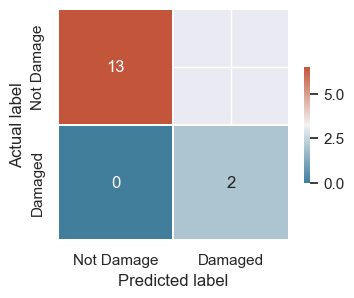

In [46]:
acc = knn(y_train,y_test ,X_train, X_test, 5)
accuracy_thirtytwo_min_max.append(round(acc, 2))

In [47]:
#STOP

# Mean

## 16

In [48]:
df = df_damage_sixteen_min_max
X = df.drop(columns=columns)
y = df[["Damage"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=training_percent)

Classes:  [0 1]


Intercept:  [-6.42717172]


Coefficeients:  [[ 7.42951927e+00 -6.26552808e-02  1.69715872e-02  4.89344381e-02
  -8.91725824e-03  1.41944092e-02 -2.14760416e-02  3.96743602e-02
  -7.17083115e-03 -1.65000035e-02 -2.40477264e-03  1.75424450e-02
  -3.19489906e-03  3.00515616e-02 -5.11902050e-02  1.57741155e-02
   1.62021995e-02 -1.52801852e-01  9.55196157e-02  1.61473902e-03
  -1.03871794e-02]]


     Original  Dominant
48          0         0
40          1         1
113         1         1
109         0         0
73          1         1
35          1         1
88          0         0
145         0         0
69          0         0
16          0         0
59          0         0
117         0         0
119         0         0
65          0         0
10          0         0


              precision    recall  f1-score   support

           0      1.000     1.000     1.000        11
           1      1.000     1.000     1.000         4

    accuracy                        

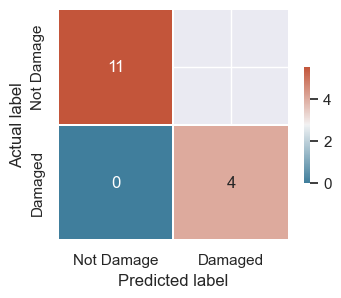

In [49]:
acc = logistic_regression(y_train, y_test, X_train, X_test)
accuracy_sixteen_mean.append(round(acc, 2))

     Original  Dominant
48          0         0
40          1         1
113         1         1
109         0         0
73          1         1
35          1         1
88          0         0
145         0         0
69          0         0
16          0         0
59          0         0
117         0         0
119         0         0
65          0         0
10          0         0


              precision    recall  f1-score   support

           0      1.000     1.000     1.000        11
           1      1.000     1.000     1.000         4

    accuracy                          1.000        15
   macro avg      1.000     1.000     1.000        15
weighted avg      1.000     1.000     1.000        15

Accuracy:1.0


correct:15
incorrect:0
percentage:100.0


Original     0    1
Dominant           
0         11.0  0.0
1          0.0  4.0




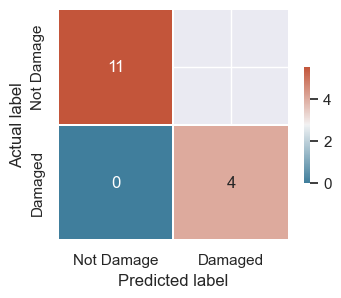

In [50]:
acc = gaussiannb(y_train, y_test, X_train, X_test)
accuracy_sixteen_mean.append(round(acc, 2))

     Original  Dominant
48          0         0
40          1         1
113         1         0
109         0         0
73          1         1
35          1         0
88          0         0
145         0         0
69          0         0
16          0         1
59          0         0
117         0         0
119         0         0
65          0         0
10          0         0


              precision    recall  f1-score   support

           0      0.833     0.909     0.870        11
           1      0.667     0.500     0.571         4

    accuracy                          0.800        15
   macro avg      0.750     0.705     0.720        15
weighted avg      0.789     0.800     0.790        15

Accuracy:0.8


correct:12
incorrect:3
percentage:80.0


Original   0  1
Dominant       
0         10  2
1          1  2




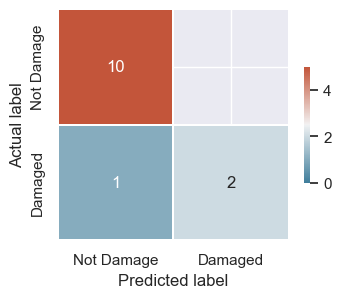

In [51]:
acc = multinomialnb(y_train, y_test, X_train, X_test)
accuracy_sixteen_mean.append(round(acc, 2))

[0 1]


[0.62406015 0.37593985]


[[  0.          51.34939759  48.56626506  46.59036145  44.61445783
   43.15662651  44.86746988  42.6626506   44.39759036  45.18072289
   48.08433735  49.72289157  47.86746988  46.          45.56626506
   45.09638554  46.74698795  33.93975904  59.51807229  46.27936747
   47.84819277]
 [  1.          78.          83.52        86.7         79.38
   87.24        89.42        88.7         84.78        87.16
   96.08        93.46        89.74        83.62        76.7
   84.02        89.96        54.9        119.44        86.155
   82.44933333]]


[[ 0.         -0.02798177  0.03575198  0.01950959  0.07953418 -0.08907281
  -0.0759801   0.11057192 -0.0226474  -0.05726737 -0.04672483  0.01898898
   0.02406445  0.05173311 -0.0675333   0.00799496  0.02559818 -0.25017877
   0.34389774 -0.00568824  0.00557635]]


     Original  Dominant
48          0         0
40          1         1
113         1         0
109         0         0
73          1         1
35         

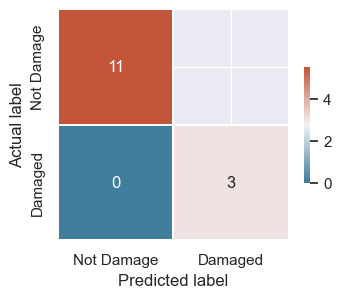

In [52]:
acc = lda(y_train, y_test, X_train, X_test)
accuracy_sixteen_mean.append(round(acc, 2))

     Original  Dominant
48          0         0
40          1         1
113         1         1
109         0         0
73          1         1
35          1         1
88          0         0
145         0         0
69          0         0
16          0         1
59          0         0
117         0         0
119         0         0
65          0         0
10          0         0


              precision    recall  f1-score   support

           0      1.000     0.909     0.952        11
           1      0.800     1.000     0.889         4

    accuracy                          0.933        15
   macro avg      0.900     0.955     0.921        15
weighted avg      0.947     0.933     0.935        15

Accuracy:0.9333333333333333


correct:14
incorrect:1
percentage:93.33333333333333


Original     0    1
Dominant           
0         10.0  0.0
1          1.0  4.0




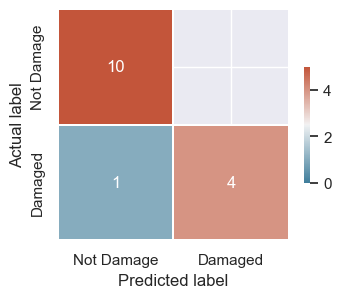

In [53]:
acc = knn(y_train,y_test ,X_train, X_test, 1)
accuracy_sixteen_mean.append(round(acc, 2))

     Original  Dominant
48          0         0
40          1         1
113         1         0
109         0         0
73          1         1
35          1         1
88          0         0
145         0         0
69          0         0
16          0         1
59          0         0
117         0         0
119         0         0
65          0         0
10          0         0


              precision    recall  f1-score   support

           0      0.909     0.909     0.909        11
           1      0.750     0.750     0.750         4

    accuracy                          0.867        15
   macro avg      0.830     0.830     0.830        15
weighted avg      0.867     0.867     0.867        15

Accuracy:0.8666666666666667


correct:13
incorrect:2
percentage:86.66666666666667


Original   0  1
Dominant       
0         10  1
1          1  3




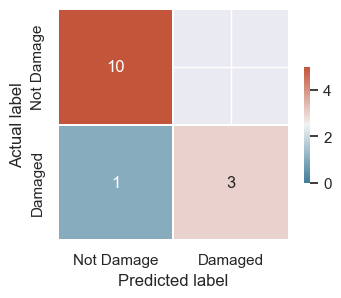

In [54]:
acc = knn(y_train,y_test ,X_train, X_test, 2)
accuracy_sixteen_mean.append(round(acc, 2))

     Original  Dominant
48          0         0
40          1         1
113         1         1
109         0         0
73          1         1
35          1         1
88          0         0
145         0         0
69          0         0
16          0         1
59          0         0
117         0         0
119         0         0
65          0         0
10          0         0


              precision    recall  f1-score   support

           0      1.000     0.909     0.952        11
           1      0.800     1.000     0.889         4

    accuracy                          0.933        15
   macro avg      0.900     0.955     0.921        15
weighted avg      0.947     0.933     0.935        15

Accuracy:0.9333333333333333


correct:14
incorrect:1
percentage:93.33333333333333


Original     0    1
Dominant           
0         10.0  0.0
1          1.0  4.0




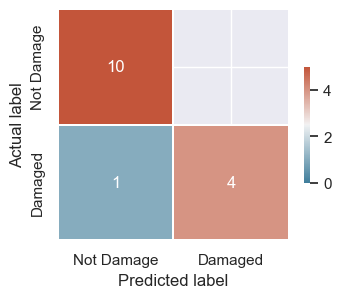

In [55]:
acc = knn(y_train,y_test ,X_train, X_test, 3)
accuracy_sixteen_mean.append(round(acc, 2))

     Original  Dominant
48          0         0
40          1         1
113         1         1
109         0         0
73          1         1
35          1         1
88          0         0
145         0         0
69          0         0
16          0         1
59          0         0
117         0         0
119         0         0
65          0         0
10          0         0


              precision    recall  f1-score   support

           0      1.000     0.909     0.952        11
           1      0.800     1.000     0.889         4

    accuracy                          0.933        15
   macro avg      0.900     0.955     0.921        15
weighted avg      0.947     0.933     0.935        15

Accuracy:0.9333333333333333


correct:14
incorrect:1
percentage:93.33333333333333


Original     0    1
Dominant           
0         10.0  0.0
1          1.0  4.0




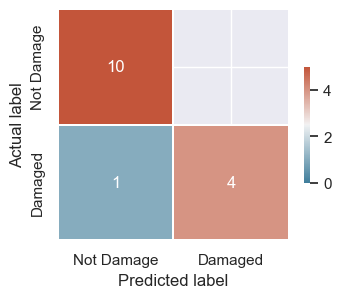

In [56]:
acc = knn(y_train,y_test ,X_train, X_test, 4)
accuracy_sixteen_mean.append(round(acc, 2))

     Original  Dominant
48          0         0
40          1         1
113         1         1
109         0         0
73          1         1
35          1         1
88          0         0
145         0         0
69          0         0
16          0         1
59          0         0
117         0         0
119         0         0
65          0         0
10          0         0


              precision    recall  f1-score   support

           0      1.000     0.909     0.952        11
           1      0.800     1.000     0.889         4

    accuracy                          0.933        15
   macro avg      0.900     0.955     0.921        15
weighted avg      0.947     0.933     0.935        15

Accuracy:0.9333333333333333


correct:14
incorrect:1
percentage:93.33333333333333


Original     0    1
Dominant           
0         10.0  0.0
1          1.0  4.0




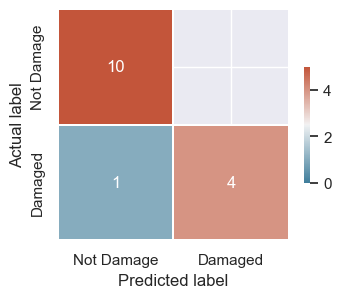

In [57]:
acc = knn(y_train,y_test ,X_train, X_test, 5)
accuracy_sixteen_mean.append(round(acc, 2))

In [58]:
#STOP

## 32

In [59]:
df = df_damage_sixteen_min_max
X = df.drop(columns=columns)
y = df[["Damage"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=training_percent)

Classes:  [0 1]


Intercept:  [-6.48732481]


Coefficeients:  [[ 7.19839663e+00 -7.67132246e-02  2.93323328e-02  6.55253078e-02
  -1.59361881e-02 -1.19594439e-03 -2.42863716e-02  3.88481782e-02
   3.67706219e-03 -2.32094413e-02 -1.25359945e-02  3.25074015e-02
  -1.63864674e-02  1.65571206e-02 -6.24246338e-02  4.41380326e-02
   2.67695251e-02 -1.89753995e-01  1.12898649e-01  1.54166844e-03
  -9.63402515e-03]]


     Original  Dominant
55          1         1
60          0         0
68          1         1
106         0         0
35          1         0
39          1         1
132         0         0
46          1         1
11          1         1
144         0         0
32          1         1
135         0         0
31          1         1
72          1         1
58          0         0


              precision    recall  f1-score   support

           0      0.857     1.000     0.923         6
           1      1.000     0.889     0.941         9

    accuracy                        

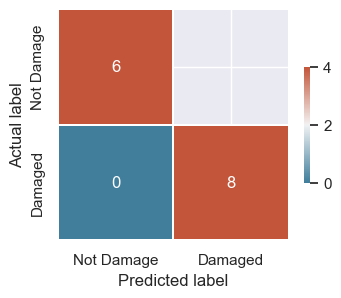

In [60]:
acc = logistic_regression(y_train, y_test, X_train, X_test)
accuracy_thirtytwo_mean.append(round(acc, 2))

     Original  Dominant
55          1         1
60          0         0
68          1         1
106         0         0
35          1         1
39          1         1
132         0         0
46          1         1
11          1         1
144         0         0
32          1         1
135         0         0
31          1         1
72          1         1
58          0         0


              precision    recall  f1-score   support

           0      1.000     1.000     1.000         6
           1      1.000     1.000     1.000         9

    accuracy                          1.000        15
   macro avg      1.000     1.000     1.000        15
weighted avg      1.000     1.000     1.000        15

Accuracy:1.0


correct:15
incorrect:0
percentage:100.0


Original    0    1
Dominant          
0         6.0  0.0
1         0.0  9.0




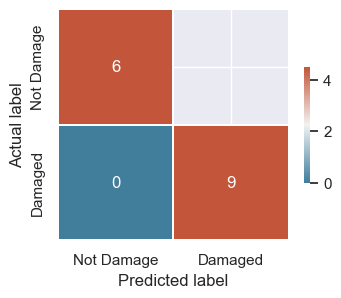

In [61]:
acc = gaussiannb(y_train, y_test, X_train, X_test)
accuracy_thirtytwo_mean.append(round(acc, 2))

     Original  Dominant
55          1         0
60          0         0
68          1         0
106         0         0
35          1         0
39          1         1
132         0         0
46          1         1
11          1         1
144         0         0
32          1         1
135         0         0
31          1         0
72          1         0
58          0         0


              precision    recall  f1-score   support

           0      0.545     1.000     0.706         6
           1      1.000     0.444     0.615         9

    accuracy                          0.667        15
   macro avg      0.773     0.722     0.661        15
weighted avg      0.818     0.667     0.652        15

Accuracy:0.6666666666666666


correct:10
incorrect:5
percentage:66.66666666666667


Original    0    1
Dominant          
0         6.0  5.0
1         0.0  4.0




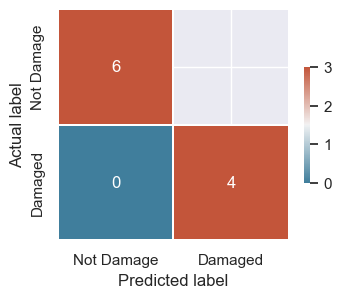

In [62]:
acc = multinomialnb(y_train, y_test, X_train, X_test)
accuracy_thirtytwo_mean.append(round(acc, 2))

[0 1]


[0.66165414 0.33834586]


[[  0.          51.31818182  48.60227273  47.03409091  44.96590909
   44.18181818  45.14772727  42.86363636  44.92045455  45.81818182
   47.97727273  49.51136364  48.14772727  46.26136364  45.38636364
   45.38636364  46.63636364  34.10227273  59.92045455  46.50994318
   48.16818182]
 [  1.          76.48888889  82.26666667  87.2         78.71111111
   88.28888889  90.28888889  87.77777778  85.6         87.08888889
   94.22222222  92.33333333  87.51111111  82.8         75.86666667
   84.26666667  90.62222222  54.02222222 119.48888889  85.70833333
   83.86814815]]


[[ 0.         -0.04896306  0.05559101  0.04892654  0.04928589 -0.07162442
  -0.05754638  0.06505604 -0.01271821 -0.06869564 -0.0468187   0.02439126
   0.02058007  0.01595395 -0.05542511  0.00947181  0.03034402 -0.2481062
   0.36933201 -0.00658423 -0.001042  ]]


     Original  Dominant
55          1         0
60          0         0
68          1         1
106         0         0
35          

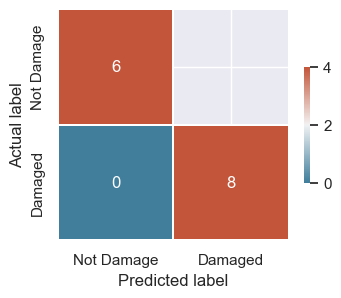

In [63]:
acc = lda(y_train, y_test, X_train, X_test)
accuracy_thirtytwo_mean.append(round(acc, 2))

     Original  Dominant
55          1         0
60          0         0
68          1         1
106         0         0
35          1         1
39          1         1
132         0         0
46          1         1
11          1         1
144         0         0
32          1         1
135         0         0
31          1         1
72          1         0
58          0         1


              precision    recall  f1-score   support

           0      0.714     0.833     0.769         6
           1      0.875     0.778     0.824         9

    accuracy                          0.800        15
   macro avg      0.795     0.806     0.796        15
weighted avg      0.811     0.800     0.802        15

Accuracy:0.8


correct:12
incorrect:3
percentage:80.0


Original  0  1
Dominant      
0         5  2
1         1  7




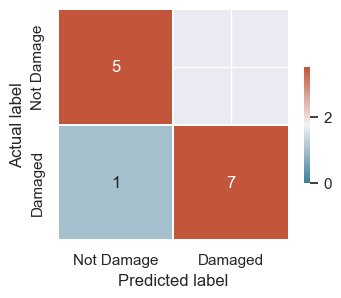

In [64]:
acc = knn(y_train,y_test ,X_train, X_test, 1)
accuracy_thirtytwo_mean.append(round(acc, 2))

     Original  Dominant
55          1         0
60          0         0
68          1         0
106         0         0
35          1         1
39          1         1
132         0         0
46          1         1
11          1         0
144         0         0
32          1         1
135         0         0
31          1         1
72          1         0
58          0         0


              precision    recall  f1-score   support

           0      0.600     1.000     0.750         6
           1      1.000     0.556     0.714         9

    accuracy                          0.733        15
   macro avg      0.800     0.778     0.732        15
weighted avg      0.840     0.733     0.729        15

Accuracy:0.7333333333333333


correct:11
incorrect:4
percentage:73.33333333333333


Original    0    1
Dominant          
0         6.0  4.0
1         0.0  5.0




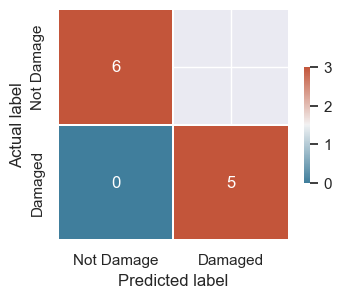

In [65]:
acc = knn(y_train,y_test ,X_train, X_test, 2)
accuracy_thirtytwo_mean.append(round(acc, 2))

     Original  Dominant
55          1         0
60          0         0
68          1         1
106         0         0
35          1         1
39          1         1
132         0         0
46          1         1
11          1         1
144         0         0
32          1         1
135         0         0
31          1         1
72          1         0
58          0         0


              precision    recall  f1-score   support

           0      0.750     1.000     0.857         6
           1      1.000     0.778     0.875         9

    accuracy                          0.867        15
   macro avg      0.875     0.889     0.866        15
weighted avg      0.900     0.867     0.868        15

Accuracy:0.8666666666666667


correct:13
incorrect:2
percentage:86.66666666666667


Original    0    1
Dominant          
0         6.0  2.0
1         0.0  7.0




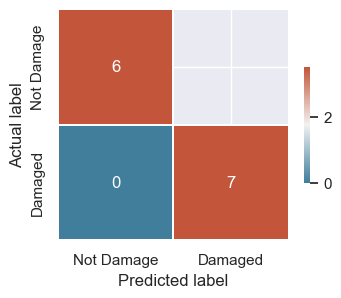

In [66]:
acc = knn(y_train,y_test ,X_train, X_test, 3)
accuracy_thirtytwo_mean.append(round(acc, 2))

     Original  Dominant
55          1         0
60          0         0
68          1         0
106         0         0
35          1         1
39          1         1
132         0         0
46          1         1
11          1         1
144         0         0
32          1         1
135         0         0
31          1         1
72          1         0
58          0         0


              precision    recall  f1-score   support

           0      0.667     1.000     0.800         6
           1      1.000     0.667     0.800         9

    accuracy                          0.800        15
   macro avg      0.833     0.833     0.800        15
weighted avg      0.867     0.800     0.800        15

Accuracy:0.8


correct:12
incorrect:3
percentage:80.0


Original    0    1
Dominant          
0         6.0  3.0
1         0.0  6.0




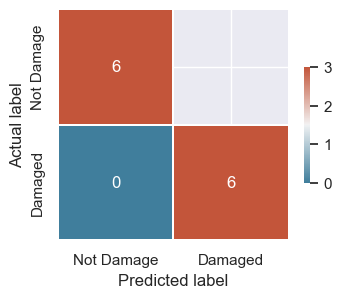

In [67]:
acc = knn(y_train,y_test ,X_train, X_test, 4)
accuracy_thirtytwo_mean.append(round(acc, 2))

     Original  Dominant
55          1         0
60          0         0
68          1         0
106         0         0
35          1         1
39          1         1
132         0         0
46          1         1
11          1         1
144         0         0
32          1         1
135         0         0
31          1         1
72          1         0
58          0         0


              precision    recall  f1-score   support

           0      0.667     1.000     0.800         6
           1      1.000     0.667     0.800         9

    accuracy                          0.800        15
   macro avg      0.833     0.833     0.800        15
weighted avg      0.867     0.800     0.800        15

Accuracy:0.8


correct:12
incorrect:3
percentage:80.0


Original    0    1
Dominant          
0         6.0  3.0
1         0.0  6.0




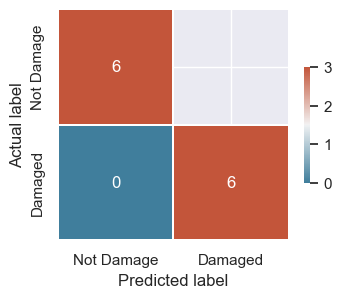

In [68]:
acc = knn(y_train,y_test ,X_train, X_test, 5)
accuracy_thirtytwo_mean.append(round(acc, 2))

In [69]:
#STOP

# Performance

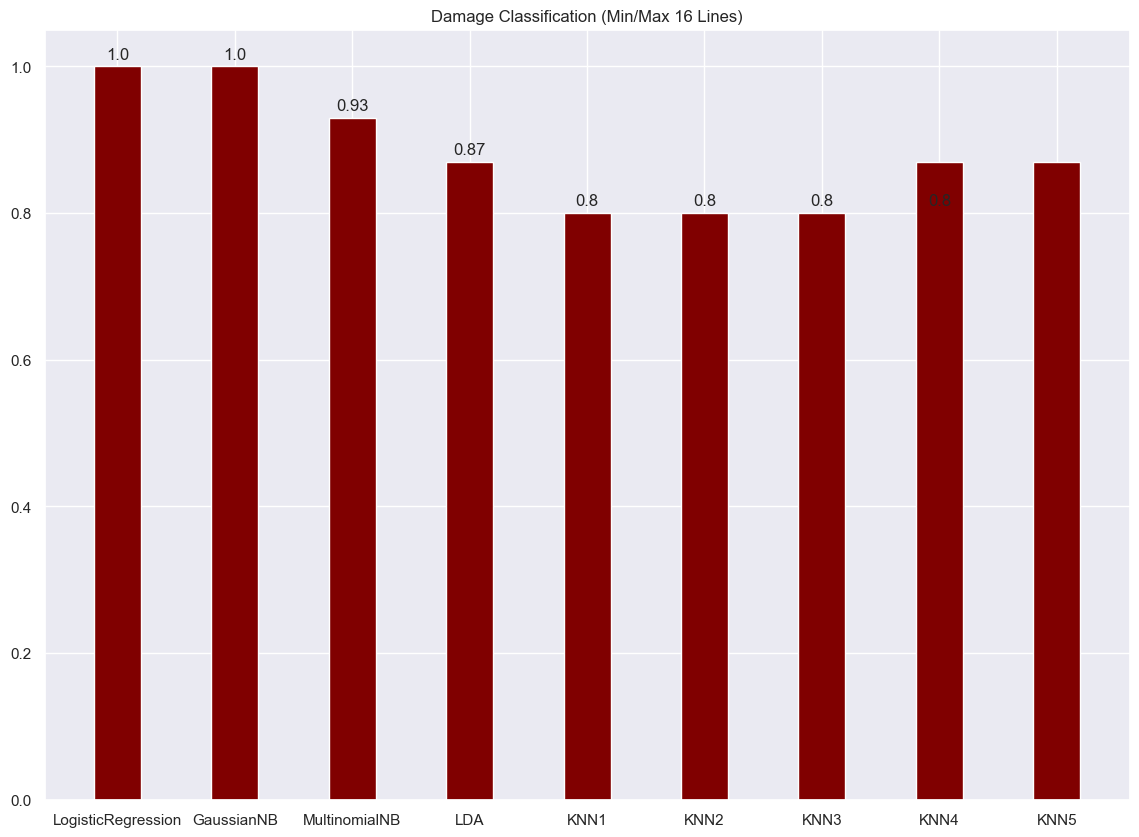

In [70]:
data = {'LogisticRegression':accuracy_sixteen_min_max[0], 'GaussianNB':accuracy_sixteen_min_max[1],
        'MultinomialNB':accuracy_sixteen_min_max[2], 'LDA':accuracy_sixteen_min_max[3],
        'KNN1':accuracy_sixteen_min_max[4], 'KNN2':accuracy_sixteen_min_max[5], 'KNN3':accuracy_sixteen_min_max[6],
       'KNN4':accuracy_sixteen_min_max[7], 'KNN5':accuracy_sixteen_min_max[8]}

plot_accuracy("Damage Classification (Min/Max 16 Lines)", data)

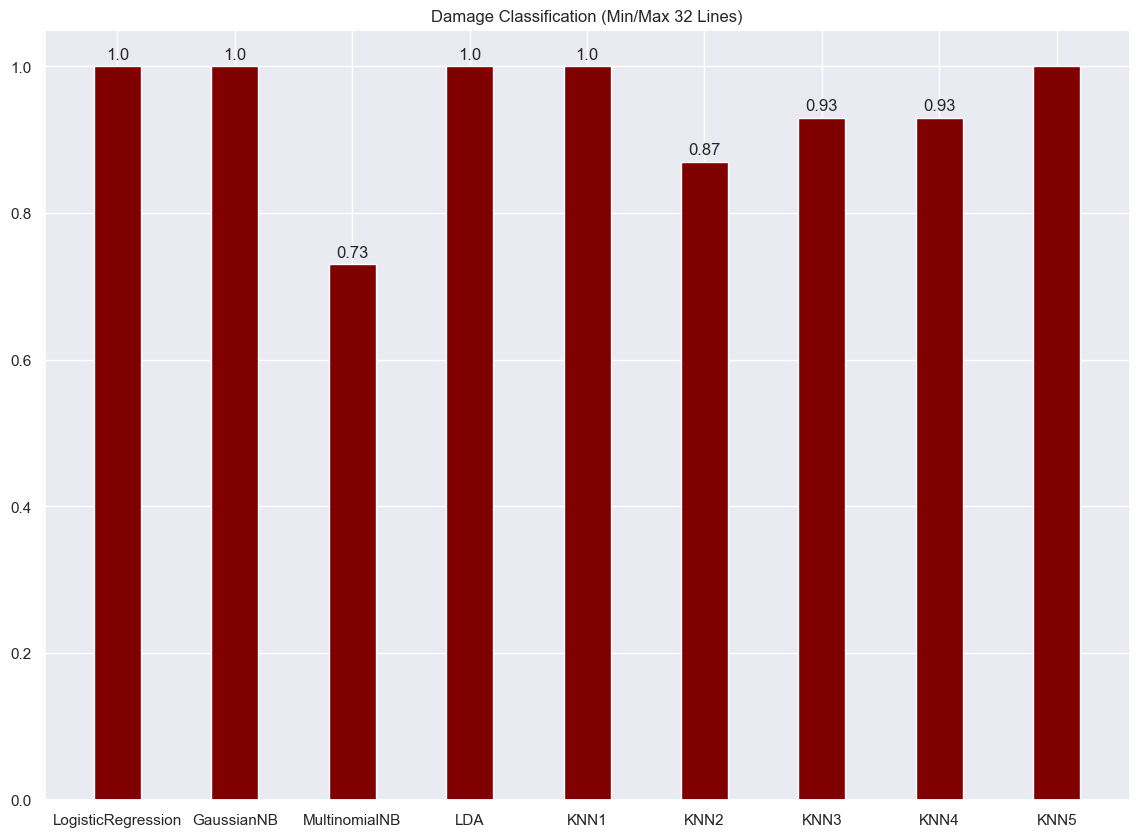

In [71]:
data = {'LogisticRegression':accuracy_thirtytwo_min_max[0], 'GaussianNB':accuracy_thirtytwo_min_max[1],
        'MultinomialNB':accuracy_thirtytwo_min_max[2], 'LDA':accuracy_thirtytwo_min_max[3],
        'KNN1':accuracy_thirtytwo_min_max[4], 'KNN2':accuracy_thirtytwo_min_max[5], 'KNN3':accuracy_thirtytwo_min_max[6],
       'KNN4':accuracy_thirtytwo_min_max[7], 'KNN5':accuracy_thirtytwo_min_max[8]}

plot_accuracy("Damage Classification (Min/Max 32 Lines)", data)

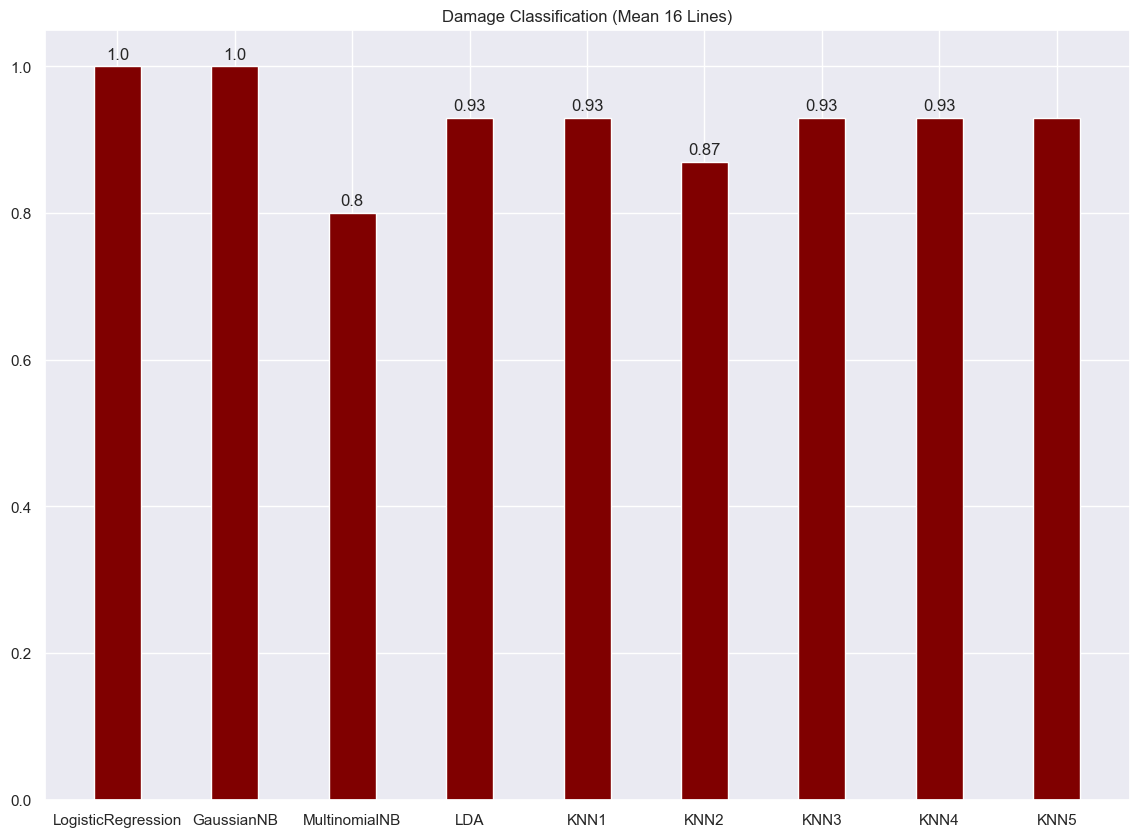

In [72]:
data = {'LogisticRegression':accuracy_sixteen_mean[0], 'GaussianNB':accuracy_sixteen_mean[1],
        'MultinomialNB':accuracy_sixteen_mean[2], 'LDA':accuracy_sixteen_mean[3],
        'KNN1':accuracy_sixteen_mean[4], 'KNN2':accuracy_sixteen_mean[5], 'KNN3':accuracy_sixteen_mean[6],
       'KNN4':accuracy_sixteen_mean[7], 'KNN5':accuracy_sixteen_mean[8]}

plot_accuracy("Damage Classification (Mean 16 Lines)", data)

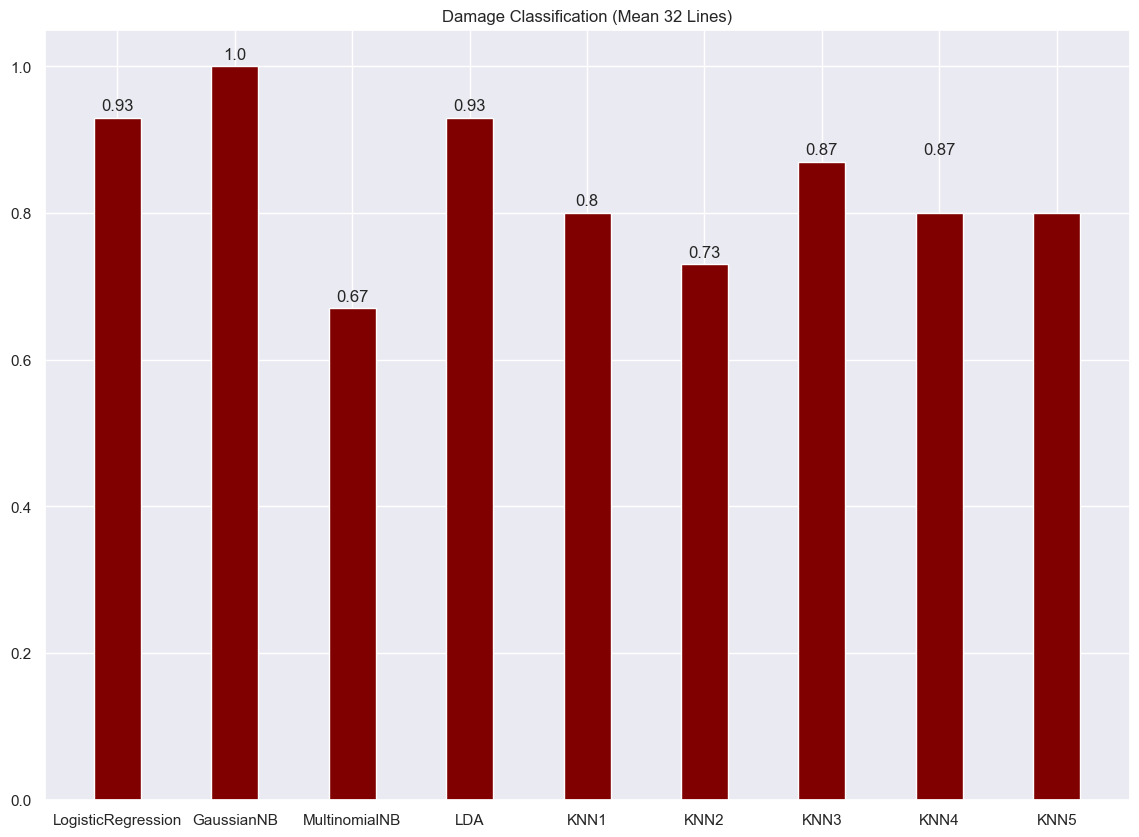

In [73]:
data = {'LogisticRegression':accuracy_thirtytwo_mean[0], 'GaussianNB':accuracy_thirtytwo_mean[1],
        'MultinomialNB':accuracy_thirtytwo_mean[2], 'LDA':accuracy_thirtytwo_mean[3],
        'KNN1':accuracy_thirtytwo_mean[4], 'KNN2':accuracy_thirtytwo_mean[5], 'KNN3':accuracy_thirtytwo_mean[6],
       'KNN4':accuracy_thirtytwo_mean[7], 'KNN5':accuracy_thirtytwo_mean[8]}

plot_accuracy("Damage Classification (Mean 32 Lines)", data)

In [ ]:
#STOP